In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/raw/inmuebles24-ciudad-de-mexico-venta-2022-07-20.csv')

In [3]:
df.head()

,name,location,description,link,price,operation,rooms,bathrooms,construction (m2),terrain (m2),estacionamientos,toilets,age,Características generales,Servicios,Amenidades,Exteriores,geolocation
0,Departamento en Venta en Roma Norte,"Roma, Cuauhtémoc",Hermosos departamentos desde 75 mts2 y hasta 1...,/propiedades/departamento-en-venta-en-roma-nor...,"MN 4,319,200",venta,2.0,2.0,75.0,NaN,1.0,NaN,0.0,"{""56"":{""featureId"":""56"",""label"":""Cuartos de se...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""140"":{""featureId"":""140"",""label"":""Salón de us...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""geolocation"":{""latitude"":19.410924700000000,..."
1,Excelente Departamento a La Venta en Reforma L...,"Bosques de las Lomas, Cuajimalpa de Morelos",Excelente departamento de 420 metros a la vent...,/propiedades/excelente-departamento-a-la-venta...,"MN 22,400,000",venta,4.0,4.0,420.0,420.0,4.0,1.0,NaN,"{""132"":{""featureId"":""132"",""label"":""Jacuzzi"",""m...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""9"":{""featureId"":""9"",""label"":""Bodega(s)"",""mea...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""geolocation"":{""latitude"":19.390416200000000,..."
2,Pent House con Roof Privado a un Precio Excelente,"Nápoles, Benito Juárez",Edificio de solo 9 departamentos en una de las...,/propiedades/pent-house-con-roof-privado-a-un-...,"MN 6,125,000",venta,2.0,NaN,136.0,66.0,2.0,NaN,0.0,"{""177"":{""featureId"":""177"",""label"":""Mascotas"",""...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""63"":{""featureId"":""63"",""label"":""Closets"",""mea...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""geolocation"":{""latitude"":19.388046900000000,..."
3,"Departamento Venta, Colonia Escandón","Escandón I Sección, Miguel Hidalgo",Departamento acogedor en primer piso de 3 reca...,/propiedades/departamento-venta-colonia-escand...,"MN 2,890,000",venta,3.0,NaN,70.0,70.0,1.0,NaN,NaN,"{""12"":{""featureId"":""12"",""label"":""Caseta de gua...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""18"":{""featureId"":""18"",""label"":""Estudio"",""mea...",NaN,"{""geolocation"":{""latitude"":19.403487800000000,..."
4,Se Vende Departamento en Condesa,"Condesa, Cuauhtémoc","Único en sus acabados, excelente oportunidad d...",/propiedades/se-vende-departamento-en-condesa-...,"MN 10,500,000",venta,2.0,2.0,128.0,133.0,2.0,NaN,NaN,"{""201"":{""featureId"":""201"",""label"":""Estado de c...",NaN,NaN,NaN,"{""geolocation"":{""latitude"":19.415425524353790,..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19639 entries, 0 to 19638
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       19639 non-null  object 
 1   location                   19639 non-null  object 
 2   description                19639 non-null  object 
 3   link                       19639 non-null  object 
 4   price                      19639 non-null  object 
 5   operation                  19639 non-null  object 
 6   rooms                      19387 non-null  float64
 7   bathrooms                  15584 non-null  float64
 8   construction (m2)          19488 non-null  float64
 9   terrain (m2)               16071 non-null  float64
 10  estacionamientos           18276 non-null  float64
 11  toilets                    6360 non-null   float64
 12  age                        8729 non-null   float64
 13  Características generales  15056 non-null  obj

In [5]:
#remplace the NaN of terrain with the corresponding construction and viss
df['terrain (m2)'].fillna(df['construction (m2)'] , inplace=True)
df['construction (m2)'].fillna(df['terrain (m2)'] , inplace=True)

In [8]:
#df['terrain (m2)'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19639 entries, 0 to 19638
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       19639 non-null  object 
 1   location                   19639 non-null  object 
 2   description                19639 non-null  object 
 3   link                       19639 non-null  object 
 4   price                      19639 non-null  object 
 5   operation                  19639 non-null  object 
 6   rooms                      19387 non-null  float64
 7   bathrooms                  15584 non-null  float64
 8   construction (m2)          19586 non-null  float64
 9   terrain (m2)               19586 non-null  float64
 10  estacionamientos           18276 non-null  float64
 11  toilets                    6360 non-null   float64
 12  age                        8729 non-null   float64
 13  Características generales  15056 non-null  obj

In [10]:
#add the divisa column
df['divisa'] = df['price'].apply(lambda x: x.split(' ')[0])
df['divisa'] = df['divisa'].apply(lambda x: 1 if 'MN' in x else 0)

In [11]:
#remove the , MN and USD from price
df['price'] = df['price'].apply(lambda x: x.split(' ')[1])
df['price'] = df['price'].apply(lambda x: x.replace(',',''))

In [12]:
df.head()

,name,location,description,link,price,operation,rooms,bathrooms,construction (m2),terrain (m2),estacionamientos,toilets,age,Características generales,Servicios,Amenidades,Exteriores,geolocation,divisa
0,Departamento en Venta en Roma Norte,"Roma, Cuauhtémoc",Hermosos departamentos desde 75 mts2 y hasta 1...,/propiedades/departamento-en-venta-en-roma-nor...,4319200,venta,2.0,2.0,75.0,75.0,1.0,NaN,0.0,"{""56"":{""featureId"":""56"",""label"":""Cuartos de se...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""140"":{""featureId"":""140"",""label"":""Salón de us...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""geolocation"":{""latitude"":19.410924700000000,...",1
1,Excelente Departamento a La Venta en Reforma L...,"Bosques de las Lomas, Cuajimalpa de Morelos",Excelente departamento de 420 metros a la vent...,/propiedades/excelente-departamento-a-la-venta...,22400000,venta,4.0,4.0,420.0,420.0,4.0,1.0,NaN,"{""132"":{""featureId"":""132"",""label"":""Jacuzzi"",""m...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""9"":{""featureId"":""9"",""label"":""Bodega(s)"",""mea...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""geolocation"":{""latitude"":19.390416200000000,...",1
2,Pent House con Roof Privado a un Precio Excelente,"Nápoles, Benito Juárez",Edificio de solo 9 departamentos en una de las...,/propiedades/pent-house-con-roof-privado-a-un-...,6125000,venta,2.0,NaN,136.0,66.0,2.0,NaN,0.0,"{""177"":{""featureId"":""177"",""label"":""Mascotas"",""...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""63"":{""featureId"":""63"",""label"":""Closets"",""mea...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""geolocation"":{""latitude"":19.388046900000000,...",1
3,"Departamento Venta, Colonia Escandón","Escandón I Sección, Miguel Hidalgo",Departamento acogedor en primer piso de 3 reca...,/propiedades/departamento-venta-colonia-escand...,2890000,venta,3.0,NaN,70.0,70.0,1.0,NaN,NaN,"{""12"":{""featureId"":""12"",""label"":""Caseta de gua...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""18"":{""featureId"":""18"",""label"":""Estudio"",""mea...",NaN,"{""geolocation"":{""latitude"":19.403487800000000,...",1
4,Se Vende Departamento en Condesa,"Condesa, Cuauhtémoc","Único en sus acabados, excelente oportunidad d...",/propiedades/se-vende-departamento-en-condesa-...,10500000,venta,2.0,2.0,128.0,133.0,2.0,NaN,NaN,"{""201"":{""featureId"":""201"",""label"":""Estado de c...",NaN,NaN,NaN,"{""geolocation"":{""latitude"":19.415425524353790,...",1


In [13]:
#! pip install CurrencyConverter

In [14]:
from currency_converter import CurrencyConverter
con = CurrencyConverter()#decimal=True)

In [15]:
con.convert(1, 'USD', 'MXN')

20.0414176797857

In [16]:
#converting USD to MN and then in Millons of Pesos
#N = df['divisa'].isin([0,2])
def usd_to_mx(row):
    if row['divisa']==0:
        price_in_mxn = int(con.convert(row['price'], 'USD', 'MXN'))
        return price_in_mxn
    else:
        return row['price']

df['price'] = df.apply(lambda row: usd_to_mx(row), axis=1)

In [17]:
df[df.divisa == 0].head()

,name,location,description,link,price,operation,rooms,bathrooms,construction (m2),terrain (m2),estacionamientos,toilets,age,Características generales,Servicios,Amenidades,Exteriores,geolocation,divisa
7,Pent House Nuevo a La Venta en El Corazón de P...,"Polanco, Miguel Hidalgo",Increíbles Pent Houses para estrenar a la Vent...,/propiedades/pent-house-nuevo-a-la-venta-en-el...,32166475,venta,3.0,3.0,277.0,277.0,2.0,1.0,0.0,"{""8"":{""featureId"":""8"",""label"":""Elevador(es)"",""...",NaN,NaN,NaN,"{""geolocation"":{""latitude"":19.433124200000001,...",0
16,Increible Departamento en Venta con Terraza en...,"Polanco, Miguel Hidalgo",Hermoso departamento A la venta con vista verd...,/propiedades/increible-departamento-en-venta-c...,30062126,venta,3.0,3.0,320.0,320.0,6.0,1.0,NaN,"{""56"":{""featureId"":""56"",""label"":""Cuartos de se...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""9"":{""featureId"":""9"",""label"":""Bodega(s)"",""mea...",NaN,"{""geolocation"":{""latitude"":19.434186600000000,...",0
19,Departamento en Venta en Polanco I Secc 3 Recá...,"Polanco, Miguel Hidalgo",Este amplio departamento se encuentra ubicado ...,/propiedades/departamento-en-venta-en-polanco-...,14610193,venta,3.0,3.0,250.0,250.0,2.0,NaN,0.0,"{""198"":{""featureId"":""198"",""label"":""Acceso disc...",NaN,"{""197"":{""featureId"":""197"",""label"":""Cuarto de T...",NaN,"{""geolocation"":{""latitude"":19.434310700000001,...",0
21,El PH Más Exclusivo de Polanco en Venta,"Polanco IV Sección, Miguel Hidalgo","Ph ubicado en la calle de galileo, en una de l...",/propiedades/el-ph-mas-exclusivo-de-polanco-en...,35072480,venta,4.0,5.0,465.0,465.0,3.0,1.0,NaN,"{""56"":{""featureId"":""56"",""label"":""Cuartos de se...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""9"":{""featureId"":""9"",""label"":""Bodega(s)"",""mea...",NaN,"{""geolocation"":{""latitude"":19.433587100000000,...",0
33,Baja Precio! Privada del Bosque Departamento e...,"Bosques de las Lomas, Cuajimalpa de Morelos","¡oportunidad baja precio de venta de $780, 000...",/propiedades/baja-precio!-privada-del-bosque-d...,14229406,venta,3.0,3.0,350.0,350.0,4.0,1.0,NaN,"{""201"":{""featureId"":""201"",""label"":""Estado de c...","{""21"":{""featureId"":""21"",""label"":""Gimnasio"",""me...","{""9"":{""featureId"":""9"",""label"":""Bodega(s)"",""mea...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""geolocation"":{""latitude"":19.393961570100000,...",0


In [18]:
#add delegacion
df['delegacion'] = df['location'].apply(lambda x: x.split(',')[-1][1:])
#add colonia
df['colonia'] = df['location'].apply(lambda x: x.split(',')[-2])

In [19]:
df['delegacion'].value_counts()

Benito Juárez             4964
Miguel Hidalgo            4763
Cuauhtémoc                2562
Cuajimalpa de Morelos     2540
Alvaro Obregón            2071
Coyoacán                   719
Tlalpan                    628
Azcapotzalco               339
Gustavo A. Madero          217
Venustiano Carranza        188
Iztapalapa                 181
Iztacalco                  158
Ciudad de México           148
La Magdalena Contreras      97
Xochimilco                  37
Tláhuac                     20
Lomas de Plateros            4
otra                         2
Contadero                    1
Name: delegacion, dtype: int64

In [20]:
df['delegacion'] = df['delegacion'].apply(lambda x: x.replace(' ', '_'))
df['delegacion'] = df['delegacion'].apply(lambda x: x.lower() )

In [21]:
df['colonia'] = df['colonia'].apply(lambda x: x.replace(' ', '_'))
df['colonia'] = df['colonia'].apply(lambda x: x.lower() )

In [22]:
df['delegacion'].value_counts()

benito_juárez             4964
miguel_hidalgo            4763
cuauhtémoc                2562
cuajimalpa_de_morelos     2540
alvaro_obregón            2071
coyoacán                   719
tlalpan                    628
azcapotzalco               339
gustavo_a._madero          217
venustiano_carranza        188
iztapalapa                 181
iztacalco                  158
ciudad_de_méxico           148
la_magdalena_contreras      97
xochimilco                  37
tláhuac                     20
lomas_de_plateros            4
otra                         2
contadero                    1
Name: delegacion, dtype: int64

In [23]:
df['colonia'].nunique()

696

In [24]:
df.groupby("delegacion")['bathrooms'].mean()

delegacion
alvaro_obregón            2.389937
azcapotzalco              2.044025
benito_juárez             2.142445
ciudad_de_méxico          2.333333
contadero                 2.000000
coyoacán                  2.204724
cuajimalpa_de_morelos     2.769705
cuauhtémoc                2.115406
gustavo_a._madero         2.214286
iztacalco                 2.037037
iztapalapa                2.045455
la_magdalena_contreras    2.218391
lomas_de_plateros         2.000000
miguel_hidalgo            2.492880
otra                      2.500000
tlalpan                   2.495968
tláhuac                        NaN
venustiano_carranza       2.022727
xochimilco                2.000000
Name: bathrooms, dtype: float64

In [25]:
null_baths = list(df.groupby("delegacion")['bathrooms'].mean()[
    df.groupby("delegacion")['bathrooms'].mean().isnull() ].index)

In [26]:
# Vamos a sustituir los valores nulos de rooms with the mean of rooms in that neighbhour
df['rooms'] = df['rooms'].fillna( df.groupby("delegacion")['rooms'].transform('mean').astype(int))

In [27]:
def fill_especial_nulls(row):
    if row['delegacion'] in null_baths:
        return row['rooms']
    else: 
        return row['bathrooms']

In [28]:
df['bathrooms'] = df.apply(lambda row: fill_especial_nulls(row), axis=1)

In [29]:
# Vamos a sustituir los valores nulos de bathrooms with the mean of rooms in that neighbhour
df['bathrooms'] = df['bathrooms'].fillna( df.groupby("delegacion")['bathrooms'].transform('mean').astype(int))

In [32]:
df.head()

,name,location,description,link,price,operation,rooms,bathrooms,construction (m2),terrain (m2),...,toilets,age,Características generales,Servicios,Amenidades,Exteriores,geolocation,divisa,delegacion,colonia
0,Departamento en Venta en Roma Norte,"Roma, Cuauhtémoc",Hermosos departamentos desde 75 mts2 y hasta 1...,/propiedades/departamento-en-venta-en-roma-nor...,4319200,venta,2.0,2.0,75.0,75.0,...,NaN,0.0,"{""56"":{""featureId"":""56"",""label"":""Cuartos de se...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""140"":{""featureId"":""140"",""label"":""Salón de us...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""geolocation"":{""latitude"":19.410924700000000,...",1,cuauhtémoc,roma
1,Excelente Departamento a La Venta en Reforma L...,"Bosques de las Lomas, Cuajimalpa de Morelos",Excelente departamento de 420 metros a la vent...,/propiedades/excelente-departamento-a-la-venta...,22400000,venta,4.0,4.0,420.0,420.0,...,1.0,NaN,"{""132"":{""featureId"":""132"",""label"":""Jacuzzi"",""m...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""9"":{""featureId"":""9"",""label"":""Bodega(s)"",""mea...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""geolocation"":{""latitude"":19.390416200000000,...",1,cuajimalpa_de_morelos,bosques_de_las_lomas
2,Pent House con Roof Privado a un Precio Excelente,"Nápoles, Benito Juárez",Edificio de solo 9 departamentos en una de las...,/propiedades/pent-house-con-roof-privado-a-un-...,6125000,venta,2.0,2.0,136.0,66.0,...,NaN,0.0,"{""177"":{""featureId"":""177"",""label"":""Mascotas"",""...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""63"":{""featureId"":""63"",""label"":""Closets"",""mea...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""geolocation"":{""latitude"":19.388046900000000,...",1,benito_juárez,nápoles
3,"Departamento Venta, Colonia Escandón","Escandón I Sección, Miguel Hidalgo",Departamento acogedor en primer piso de 3 reca...,/propiedades/departamento-venta-colonia-escand...,2890000,venta,3.0,2.0,70.0,70.0,...,NaN,NaN,"{""12"":{""featureId"":""12"",""label"":""Caseta de gua...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...","{""18"":{""featureId"":""18"",""label"":""Estudio"",""mea...",NaN,"{""geolocation"":{""latitude"":19.403487800000000,...",1,miguel_hidalgo,escandón_i_sección
4,Se Vende Departamento en Condesa,"Condesa, Cuauhtémoc","Único en sus acabados, excelente oportunidad d...",/propiedades/se-vende-departamento-en-condesa-...,10500000,venta,2.0,2.0,128.0,133.0,...,NaN,NaN,"{""201"":{""featureId"":""201"",""label"":""Estado de c...",NaN,NaN,NaN,"{""geolocation"":{""latitude"":19.415425524353790,...",1,cuauhtémoc,condesa


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19639 entries, 0 to 19638
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       19639 non-null  object 
 1   location                   19639 non-null  object 
 2   description                19639 non-null  object 
 3   link                       19639 non-null  object 
 4   price                      19639 non-null  object 
 5   operation                  19639 non-null  object 
 6   rooms                      19639 non-null  float64
 7   bathrooms                  19639 non-null  float64
 8   construction (m2)          19586 non-null  float64
 9   terrain (m2)               19586 non-null  float64
 10  estacionamientos           18276 non-null  float64
 11  toilets                    6360 non-null   float64
 12  age                        8729 non-null   float64
 13  Características generales  15056 non-null  obj

In [34]:
# Lets do the same for the construction and terrain extention but this time calculating the avg price per
# square meter and dividing it by its price to obtain the aproximate contruction dimentions. 
df['price'] = df['price'].astype(float)

In [35]:
df['price_per_meter']=df['price'].astype(int)/df['construction (m2)']

In [36]:
df['construction (m2)'] = df['construction (m2)'].fillna( 
    df['price'] / df.groupby("delegacion")['price_per_meter'].transform('mean') )

In [37]:
df['terrain (m2)'] = df['terrain (m2)'].fillna(df['construction (m2)'])

In [38]:
df['estacionamientos'] = df['estacionamientos'].fillna(0)

In [39]:
df['bathrooms'] = np.where(df['toilets']==1, df['bathrooms'] + 0.5, df['bathrooms'] )

In [40]:
df['toilets'] = df['toilets'].fillna(0)

In [41]:
df = df.drop(columns=['age'])

In [42]:
df['id'] = df.index

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19639 entries, 0 to 19638
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       19639 non-null  object 
 1   location                   19639 non-null  object 
 2   description                19639 non-null  object 
 3   link                       19639 non-null  object 
 4   price                      19639 non-null  float64
 5   operation                  19639 non-null  object 
 6   rooms                      19639 non-null  float64
 7   bathrooms                  19639 non-null  float64
 8   construction (m2)          19639 non-null  float64
 9   terrain (m2)               19639 non-null  float64
 10  estacionamientos           19639 non-null  float64
 11  toilets                    19639 non-null  float64
 12  Características generales  15056 non-null  object 
 13  Servicios                  10509 non-null  obj

In [44]:
sample = np.random.choice(df.id.unique(),1)
sample

array([7270])

In [45]:
dic = df[df.id.isin(sample)]['Características generales'].values[0][0:-1]

In [46]:
dic

'{"132":{"featureId":"132","label":"Jacuzzi","measure":null,"value":null,"icon":null},"56":{"featureId":"56","label":"Cuartos de servicio","measure":null,"value":null,"icon":null},"27":{"featureId":"27","label":"Alberca","measure":null,"value":null,"icon":null},"8":{"featureId":"8","label":"Elevador(es)","measure":null,"value":"1","icon":null},"207":{"featureId":"207","label":"Piso en el que se encuentra","measure":null,"value":"28","icon":null},"196":{"featureId":"196","label":"Cocina integral","measure":null,"value":null,"icon":null}}'

In [47]:
aux = df[df.id.isin(sample)]

In [48]:
import json
d = json.loads(dic)

In [49]:
d

{'132': {'featureId': '132',
  'label': 'Jacuzzi',
  'measure': None,
  'value': None,
  'icon': None},
 '56': {'featureId': '56',
  'label': 'Cuartos de servicio',
  'measure': None,
  'value': None,
  'icon': None},
 '27': {'featureId': '27',
  'label': 'Alberca',
  'measure': None,
  'value': None,
  'icon': None},
 '8': {'featureId': '8',
  'label': 'Elevador(es)',
  'measure': None,
  'value': '1',
  'icon': None},
 '207': {'featureId': '207',
  'label': 'Piso en el que se encuentra',
  'measure': None,
  'value': '28',
  'icon': None},
 '196': {'featureId': '196',
  'label': 'Cocina integral',
  'measure': None,
  'value': None,
  'icon': None}}

In [50]:
for key in d.keys():
    amenidad = d[key]['label'].replace(" ", "_").lower()
    valor = d[key]['value'] if d[key]['value'] else 1
    aux[amenidad] = valor
    print(amenidad, valor)

jacuzzi 1
cuartos_de_servicio 1
alberca 1
elevador(es) 1
piso_en_el_que_se_encuentra 28
cocina_integral 1


/tmp/ipykernel_718/1661193492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[amenidad] = valor
/tmp/ipykernel_718/1661193492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[amenidad] = valor
/tmp/ipykernel_718/1661193492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [51]:
def parse_general_caracteristis(row):
    try:
        dic = row['Características generales'][0:-1]
        dic = json.loads(dic)
        for key in dic.keys():
            amenidad = dic[key]['label'].replace(" ", "_").lower()
            valor = dic[key]['value'] if dic[key]['value'] else 1
            row[amenidad] = valor
    except Exception:
        pass
    return row

In [52]:
aux = df.apply(lambda row: parse_general_caracteristis(row), axis=1)

In [54]:
aux

,Amenidades,Características generales,Exteriores,Servicios,acceso_discapacitados,acceso_tercera_edad,alberca,amueblado,bathrooms,camas,...,parques_cercanos,piso_en_el_que_se_encuentra,price,price_per_meter,rooms,terrain (m2),tipo_de_cielo_raso,tipo_de_piso,toilets,ubicación
0,"{""140"":{""featureId"":""140"",""label"":""Salón de us...","{""56"":{""featureId"":""56"",""label"":""Cuartos de se...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...",NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,4319200.0,57589.333333,2.0,75.0,NaN,NaN,0.0,NaN
1,"{""9"":{""featureId"":""9"",""label"":""Bodega(s)"",""mea...","{""132"":{""featureId"":""132"",""label"":""Jacuzzi"",""m...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...",NaN,NaN,1.0,NaN,4.5,NaN,...,NaN,4,22400000.0,53333.333333,4.0,420.0,NaN,NaN,1.0,NaN
2,"{""63"":{""featureId"":""63"",""label"":""Closets"",""mea...","{""177"":{""featureId"":""177"",""label"":""Mascotas"",""...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...",NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,6125000.0,45036.764706,2.0,66.0,NaN,NaN,0.0,NaN
3,"{""18"":{""featureId"":""18"",""label"":""Estudio"",""mea...","{""12"":{""featureId"":""12"",""label"":""Caseta de gua...",NaN,"{""45"":{""featureId"":""45"",""label"":""Seguridad pri...",NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,2890000.0,41285.714286,3.0,70.0,NaN,NaN,0.0,NaN
4,NaN,"{""201"":{""featureId"":""201"",""label"":""Estado de c...",NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,1,10500000.0,82031.250000,2.0,133.0,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19634,NaN,"{""15"":{""featureId"":""15"",""label"":""Chimenea"",""me...",NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,1370000.0,22096.774194,3.0,62.0,NaN,NaN,0.0,NaN
19635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,1000000.0,13333.333333,2.0,75.0,NaN,NaN,0.0,NaN
19636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,1035000.0,14178.082192,2.0,73.0,NaN,NaN,0.0,NaN
19637,"{""63"":{""featureId"":""63"",""label"":""Closets"",""mea...","{""12"":{""featureId"":""12"",""label"":""Caseta de gua...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""22"":{""featureId"":""22"",""label"":""Internet/Wifi...",NaN,NaN,1.0,NaN,2.0,NaN,...,NaN,3,800098.0,10001.225000,2.0,80.0,NaN,NaN,0.0,Frente


In [55]:
aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19639 entries, 0 to 19638
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amenidades                    11262 non-null  object 
 1   Características generales     15056 non-null  object 
 2   Exteriores                    5595 non-null   object 
 3   Servicios                     10509 non-null  object 
 4   acceso_discapacitados         2655 non-null   float64
 5   acceso_tercera_edad           378 non-null    float64
 6   alberca                       4346 non-null   float64
 7   amueblado                     611 non-null    object 
 8   bathrooms                     19639 non-null  float64
 9   camas                         68 non-null     object 
 10  caseta_de_guardia             3391 non-null   float64
 11  categoria                     1 non-null      object 
 12  centros_comerciales_cercanos  1133 non-null   float64
 13  c

In [56]:
sample = np.random.choice(df.id.unique(),1)
sample
dic = df[df.id.isin(sample)]['Servicios'].values[0][0:-1]
d = json.loads(dic)
d

{'45': {'featureId': '45',
  'label': 'Seguridad privada',
  'measure': None,
  'value': None,
  'icon': None},
 '24': {'featureId': '24',
  'label': 'Línea blanca',
  'measure': None,
  'value': None,
  'icon': None}}

In [57]:
for key in d.keys():
    amenidad = d[key]['label'].replace(" ", "_").lower()
    valor = d[key]['value'] if d[key]['value'] else 1
    aux[amenidad] = valor
    print(amenidad, valor)

seguridad_privada 1
línea_blanca 1


In [58]:
def parse_servicios(row):
    try:
        dic = row['Servicios'][0:-1]
        dic = json.loads(dic)
        for key in dic.keys():
            amenidad = dic[key]['label'].replace(" ", "_").lower()
            valor = dic[key]['value'] if dic[key]['value'] else 1
            row[amenidad] = valor
    except Exception:
        pass
    return row

In [59]:
aux2 = aux.apply(lambda row: parse_servicios(row), axis=1)

In [54]:
aux2

,Amenidades,Características generales,Exteriores,Servicios,acceso_discapacitados,acceso_tercera_edad,aire_acondicionado,alberca,amueblado,bathrooms,...,price_per_meter,rooms,seguridad_privada,terrain (m2),tipo_de_cielo_raso,tipo_de_iluminación,tipo_de_piso,toilets,ubicación,área_de_juegos_infantiles
0,"{""140"":{""featureId"":""140"",""label"":""Salón de us...","{""56"":{""featureId"":""56"",""label"":""Cuartos de se...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...",NaN,NaN,NaN,NaN,NaN,2.0,...,57589.333333,2.0,1,75.0,NaN,NaN,NaN,0.0,NaN,1.0
1,"{""9"":{""featureId"":""9"",""label"":""Bodega(s)"",""mea...","{""132"":{""featureId"":""132"",""label"":""Jacuzzi"",""m...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...",NaN,NaN,NaN,1.0,NaN,4.5,...,53333.333333,4.0,1,420.0,NaN,NaN,NaN,1.0,NaN,1.0
2,"{""63"":{""featureId"":""63"",""label"":""Closets"",""mea...","{""177"":{""featureId"":""177"",""label"":""Mascotas"",""...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...",NaN,NaN,NaN,NaN,NaN,2.0,...,45036.764706,2.0,1,66.0,NaN,NaN,NaN,0.0,NaN,NaN
3,"{""18"":{""featureId"":""18"",""label"":""Estudio"",""mea...","{""12"":{""featureId"":""12"",""label"":""Caseta de gua...",NaN,"{""45"":{""featureId"":""45"",""label"":""Seguridad pri...",NaN,NaN,NaN,NaN,NaN,2.0,...,41285.714286,3.0,1,70.0,NaN,NaN,NaN,0.0,NaN,NaN
4,NaN,"{""201"":{""featureId"":""201"",""label"":""Estado de c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,82031.250000,2.0,1,133.0,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19634,NaN,"{""15"":{""featureId"":""15"",""label"":""Chimenea"",""me...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,22096.774194,3.0,1,62.0,NaN,NaN,NaN,0.0,NaN,NaN
19635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,13333.333333,2.0,1,75.0,NaN,NaN,NaN,0.0,NaN,NaN
19636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,14178.082192,2.0,1,73.0,NaN,NaN,NaN,0.0,NaN,NaN
19637,"{""63"":{""featureId"":""63"",""label"":""Closets"",""mea...","{""12"":{""featureId"":""12"",""label"":""Caseta de gua...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""22"":{""featureId"":""22"",""label"":""Internet/Wifi...",NaN,NaN,NaN,1.0,NaN,2.0,...,10001.225000,2.0,1,80.0,NaN,NaN,NaN,0.0,Frente,1.0


In [56]:
sample = np.random.choice(df[df['Exteriores'].notnull()].id.unique(),1)
dic = df[df.id.isin(sample)]['Exteriores'].values[0][0:-2]
d = json.loads(dic)
d

{'128': {'featureId': '128',
  'label': 'Cancha de tenis',
  'measure': None,
  'value': None,
  'icon': None}}

In [57]:
for key in d.keys():
    amenidad = d[key]['label'].replace(" ", "_").lower()
    valor = d[key]['value'] if d[key]['value'] else 1
    aux[amenidad] = valor
    print(amenidad, valor)

cancha_de_tenis 1


In [58]:
def parse_exteriores(row):
    try:
        dic = row['Exteriores'][0:-2]
        dic = json.loads(dic)
        for key in dic.keys():
            amenidad = dic[key]['label'].replace(" ", "_").lower()
            valor = dic[key]['value'] if dic[key]['value'] else 1
            row[amenidad] = valor
    except Exception:
        pass
    return row

In [59]:
aux3 = aux2.apply(lambda row: parse_exteriores(row), axis=1)

In [60]:
aux3

,Amenidades,Características generales,Exteriores,Servicios,acceso_discapacitados,acceso_tercera_edad,aire_acondicionado,alberca,amueblado,asador,...,price_per_meter,rooms,seguridad_privada,terrain (m2),tipo_de_cielo_raso,tipo_de_iluminación,tipo_de_piso,toilets,ubicación,área_de_juegos_infantiles
0,"{""140"":{""featureId"":""140"",""label"":""Salón de us...","{""56"":{""featureId"":""56"",""label"":""Cuartos de se...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...",NaN,NaN,NaN,NaN,NaN,1.0,...,57589.333333,2.0,1,75.0,NaN,NaN,NaN,0.0,NaN,1.0
1,"{""9"":{""featureId"":""9"",""label"":""Bodega(s)"",""mea...","{""132"":{""featureId"":""132"",""label"":""Jacuzzi"",""m...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...",NaN,NaN,NaN,1.0,NaN,1.0,...,53333.333333,4.0,1,420.0,NaN,NaN,NaN,1.0,NaN,1.0
2,"{""63"":{""featureId"":""63"",""label"":""Closets"",""mea...","{""177"":{""featureId"":""177"",""label"":""Mascotas"",""...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""45"":{""featureId"":""45"",""label"":""Seguridad pri...",NaN,NaN,NaN,NaN,NaN,1.0,...,45036.764706,2.0,1,66.0,NaN,NaN,NaN,0.0,NaN,NaN
3,"{""18"":{""featureId"":""18"",""label"":""Estudio"",""mea...","{""12"":{""featureId"":""12"",""label"":""Caseta de gua...",NaN,"{""45"":{""featureId"":""45"",""label"":""Seguridad pri...",NaN,NaN,NaN,NaN,NaN,NaN,...,41285.714286,3.0,1,70.0,NaN,NaN,NaN,0.0,NaN,NaN
4,NaN,"{""201"":{""featureId"":""201"",""label"":""Estado de c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82031.250000,2.0,1,133.0,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19634,NaN,"{""15"":{""featureId"":""15"",""label"":""Chimenea"",""me...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22096.774194,3.0,1,62.0,NaN,NaN,NaN,0.0,NaN,NaN
19635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13333.333333,2.0,1,75.0,NaN,NaN,NaN,0.0,NaN,NaN
19636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14178.082192,2.0,1,73.0,NaN,NaN,NaN,0.0,NaN,NaN
19637,"{""63"":{""featureId"":""63"",""label"":""Closets"",""mea...","{""12"":{""featureId"":""12"",""label"":""Caseta de gua...","{""5"":{""featureId"":""5"",""label"":""Asador"",""measur...","{""22"":{""featureId"":""22"",""label"":""Internet/Wifi...",NaN,NaN,NaN,1.0,NaN,1.0,...,10001.225000,2.0,1,80.0,NaN,NaN,NaN,0.0,Frente,1.0


In [61]:
aux3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19639 entries, 0 to 19638
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amenidades                    11262 non-null  object 
 1   Características generales     15056 non-null  object 
 2   Exteriores                    5595 non-null   object 
 3   Servicios                     10509 non-null  object 
 4   acceso_discapacitados         2655 non-null   float64
 5   acceso_tercera_edad           378 non-null    float64
 6   aire_acondicionado            692 non-null    float64
 7   alberca                       4346 non-null   float64
 8   amueblado                     611 non-null    object 
 9   asador                        3210 non-null   float64
 10  bathrooms                     19639 non-null  float64
 11  calefacción                   410 non-null    float64
 12  calentador_de_agua            596 non-null    float64
 13  c

In [62]:
sample = np.random.choice(aux3.id.unique(),1)
sample
dic = aux3[aux3.id.isin(sample)]['geolocation'].values[0]#[0:-2]
d = json.loads(dic)
d

{'geolocation': {'latitude': 19.434577682598288,
  'longitude': -99.20051239999998}}

In [63]:
d['geolocation']['longitude']

-99.20051239999998

In [64]:
def parse_geo(row):
    try:
        dic = row['geolocation']#.values[0]
        dic = json.loads(dic)
        row['latitude'] = dic['geolocation']['latitude']
        row['longitude'] = dic['geolocation']['longitude']
        return row
    except Exception:
        return row
        pass

In [65]:
aux4 = aux3.apply(lambda row: parse_geo(row), axis=1)
#zip(*df['num'].map(powers))

In [66]:
aux4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19639 entries, 0 to 19638
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amenidades                    11262 non-null  object 
 1   Características generales     15056 non-null  object 
 2   Exteriores                    5595 non-null   object 
 3   Servicios                     10509 non-null  object 
 4   acceso_discapacitados         2655 non-null   float64
 5   acceso_tercera_edad           378 non-null    float64
 6   aire_acondicionado            692 non-null    float64
 7   alberca                       4346 non-null   float64
 8   amueblado                     611 non-null    object 
 9   asador                        3210 non-null   float64
 10  bathrooms                     19639 non-null  float64
 11  calefacción                   410 non-null    float64
 12  calentador_de_agua            596 non-null    float64
 13  c

In [67]:
aux4.columns

Index(['Amenidades', 'Características generales', 'Exteriores', 'Servicios',
       'acceso_discapacitados', 'acceso_tercera_edad', 'aire_acondicionado',
       'alberca', 'amueblado', 'asador', 'bathrooms', 'calefacción',
       'calentador_de_agua', 'camas', 'cancha_de_squash', 'cancha_de_tenis',
       'caseta_de_guardia', 'categoria', 'centros_comerciales_cercanos',
       'chimenea', 'cisterna', 'cocina_integral', 'colonia', 'comedor',
       'construction (m2)', 'cuartos_de_servicio', 'delegacion', 'description',
       'divisa', 'elevador(es)', 'escuelas_cercanas',
       'estacionamiento_de_visitas', 'estacionamientos',
       'estado_de_conservación', 'estancia_mínima_en_días', 'fecha_disponible',
       'frente_a_parque', 'fumadores', 'gas', 'geolocation', 'gimnasio', 'id',
       'internet/wifi', 'jacuzzi', 'jardín_privado', 'latitude', 'link',
       'location', 'longitude', 'línea_blanca', 'línea_telefónica',
       'm&sup2;_de_jardín', 'mascotas', 'name', 'niveles_constru

In [68]:
aux4['construction_m2']=aux4['construction (m2)'] 
aux4['terrain_m2']=aux4['terrain (m2)']
del aux4['construction (m2)'] 
del aux4['terrain (m2)']

In [69]:
aux4.columns

Index(['Amenidades', 'Características generales', 'Exteriores', 'Servicios',
       'acceso_discapacitados', 'acceso_tercera_edad', 'aire_acondicionado',
       'alberca', 'amueblado', 'asador', 'bathrooms', 'calefacción',
       'calentador_de_agua', 'camas', 'cancha_de_squash', 'cancha_de_tenis',
       'caseta_de_guardia', 'categoria', 'centros_comerciales_cercanos',
       'chimenea', 'cisterna', 'cocina_integral', 'colonia', 'comedor',
       'cuartos_de_servicio', 'delegacion', 'description', 'divisa',
       'elevador(es)', 'escuelas_cercanas', 'estacionamiento_de_visitas',
       'estacionamientos', 'estado_de_conservación', 'estancia_mínima_en_días',
       'fecha_disponible', 'frente_a_parque', 'fumadores', 'gas',
       'geolocation', 'gimnasio', 'id', 'internet/wifi', 'jacuzzi',
       'jardín_privado', 'latitude', 'link', 'location', 'longitude',
       'línea_blanca', 'línea_telefónica', 'm&sup2;_de_jardín', 'mascotas',
       'name', 'niveles_construidos', 'número_de_dep

In [70]:
column_names = []
for i in aux4.columns:
    if sum(aux4[i].notnull()) > int(len(aux4)*0.01): 
        column_names.append(i)

In [71]:
column_names

['Amenidades',
 'Características generales',
 'Exteriores',
 'Servicios',
 'acceso_discapacitados',
 'acceso_tercera_edad',
 'aire_acondicionado',
 'alberca',
 'amueblado',
 'asador',
 'bathrooms',
 'calefacción',
 'calentador_de_agua',
 'cancha_de_squash',
 'cancha_de_tenis',
 'caseta_de_guardia',
 'centros_comerciales_cercanos',
 'chimenea',
 'cisterna',
 'cocina_integral',
 'colonia',
 'cuartos_de_servicio',
 'delegacion',
 'description',
 'divisa',
 'elevador(es)',
 'escuelas_cercanas',
 'estacionamiento_de_visitas',
 'estacionamientos',
 'estado_de_conservación',
 'fecha_disponible',
 'frente_a_parque',
 'fumadores',
 'gas',
 'geolocation',
 'gimnasio',
 'id',
 'internet/wifi',
 'jacuzzi',
 'jardín_privado',
 'latitude',
 'link',
 'location',
 'longitude',
 'línea_blanca',
 'línea_telefónica',
 'mascotas',
 'name',
 'número_de_departamentos',
 'operation',
 'parques_cercanos',
 'piso_en_el_que_se_encuentra',
 'price',
 'price_per_meter',
 'rooms',
 'seguridad_privada',
 'toilets',

In [72]:
aux5 = aux4[column_names]

In [73]:
aux5.columns

Index(['Amenidades', 'Características generales', 'Exteriores', 'Servicios',
       'acceso_discapacitados', 'acceso_tercera_edad', 'aire_acondicionado',
       'alberca', 'amueblado', 'asador', 'bathrooms', 'calefacción',
       'calentador_de_agua', 'cancha_de_squash', 'cancha_de_tenis',
       'caseta_de_guardia', 'centros_comerciales_cercanos', 'chimenea',
       'cisterna', 'cocina_integral', 'colonia', 'cuartos_de_servicio',
       'delegacion', 'description', 'divisa', 'elevador(es)',
       'escuelas_cercanas', 'estacionamiento_de_visitas', 'estacionamientos',
       'estado_de_conservación', 'fecha_disponible', 'frente_a_parque',
       'fumadores', 'gas', 'geolocation', 'gimnasio', 'id', 'internet/wifi',
       'jacuzzi', 'jardín_privado', 'latitude', 'link', 'location',
       'longitude', 'línea_blanca', 'línea_telefónica', 'mascotas', 'name',
       'número_de_departamentos', 'operation', 'parques_cercanos',
       'piso_en_el_que_se_encuentra', 'price', 'price_per_meter',

In [74]:
import seaborn as sns
nu = aux5.nunique().reset_index()
nu.columns = ['feature','nunique']
nu[nu['nunique'] <= 2 ]['feature'].values

array(['acceso_discapacitados', 'acceso_tercera_edad',
       'aire_acondicionado', 'alberca', 'amueblado', 'asador',
       'calefacción', 'calentador_de_agua', 'cancha_de_squash',
       'cancha_de_tenis', 'caseta_de_guardia',
       'centros_comerciales_cercanos', 'chimenea', 'cisterna',
       'cocina_integral', 'cuartos_de_servicio', 'divisa',
       'escuelas_cercanas', 'estacionamiento_de_visitas',
       'frente_a_parque', 'fumadores', 'gas', 'gimnasio', 'internet/wifi',
       'jacuzzi', 'jardín_privado', 'línea_blanca', 'línea_telefónica',
       'mascotas', 'operation', 'parques_cercanos', 'seguridad_privada',
       'toilets', 'ubicación', 'área_de_juegos_infantiles'], dtype=object)

In [75]:
cat_binar = [
'acceso_discapacitados', 'acceso_tercera_edad',
       'aire_acondicionado', 'alberca', 'amueblado', 'asador',
       'calefacción', 'calentador_de_agua', 'cancha_de_squash',
       'cancha_de_tenis', 'caseta_de_guardia',
       'centros_comerciales_cercanos', 'chimenea', 'cisterna',
       'cocina_integral', 'cuartos_de_servicio', 'divisa',
       'escuelas_cercanas', 'estacionamiento_de_visitas',
       'frente_a_parque', 'fumadores', 'gas', 'gimnasio', 'internet/wifi',
       'jacuzzi', 'jardín_privado', 'línea_blanca', 'línea_telefónica',
       'mascotas', 'parques_cercanos', 'seguridad_privada',
       'toilets', 'área_de_juegos_infantiles'
]

In [76]:
aux5[cat_binar] = aux5[cat_binar].fillna(0)

/tmp/ipykernel_589/1698607653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux5[cat_binar] = aux5[cat_binar].fillna(0)


In [99]:
multi_cat = ['delegacion', 'colonia', 'estado_de_conservación']

In [78]:
cat_columns = multi_cat + cat_binar

/tmp/ipykernel_589/599058371.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  aux5[cat_columns].mean().sort_values().plot(kind='bar', grid=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'fumadores'),
  Text(1, 0, 'chimenea'),
  Text(2, 0, 'parques_cercanos'),
  Text(3, 0, 'línea_telefónica'),
  Text(4, 0, 'cancha_de_squash'),
  Text(5, 0, 'acceso_tercera_edad'),
  Text(6, 0, 'calefacción'),
  Text(7, 0, 'calentador_de_agua'),
  Text(8, 0, 'línea_blanca'),
  Text(9, 0, 'gas'),
  Text(10, 0, 'cisterna'),
  Text(11, 0, 'aire_acondicionado'),
  Text(12, 0, 'frente_a_parque'),
  Text(13, 0, 'centros_comerciales_cercanos'),
  Text(14, 0, 'cancha_de_tenis'),
  Text(15, 0, 'jardín_privado'),
  Text(16, 0, 'internet/wifi'),
  Text(17, 0, 'estacionamiento_de_visitas'),
  Text(18, 0, 'jacuzzi'),
  Text(19, 0, 'acceso_discapacitados'),
  Text(20, 0, 'asador'),
  Text(21, 0, 'caseta_de_guardia'),
  Text(22, 0, 'área_de_juegos_infantiles'),
  Text(23, 0, 'alberca'),
  Text(24, 0, 'cuartos_de_servicio'),
  Text(25, 0, 'escuela

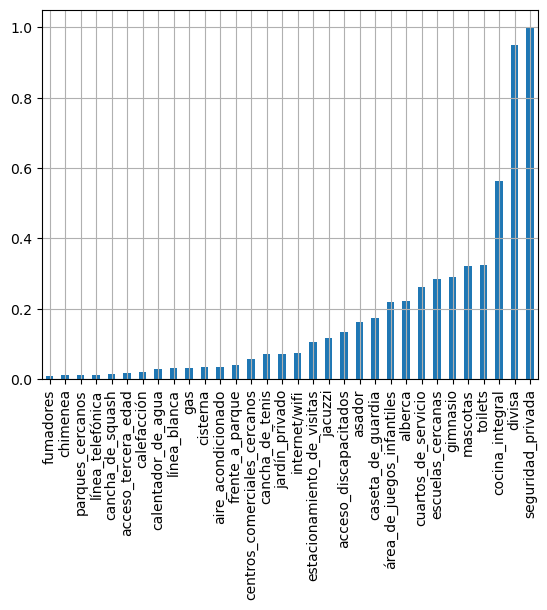

In [79]:
import matplotlib.pyplot as plt
aux5[cat_columns].mean().sort_values().plot(kind='bar', grid=True)
plt.xticks(rotation=90)

In [80]:
num_columns = [
'id',
'construction_m2',
'terrain_m2',
 'bathrooms',
 'elevador(es)',
 'estacionamientos',
 'latitude',
 'longitude',
 'número_de_departamentos',
 'piso_en_el_que_se_encuentra',
 'price',
 'rooms'
]

In [81]:
aux5[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19639 entries, 0 to 19638
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           19639 non-null  int64  
 1   construction_m2              19639 non-null  float64
 2   terrain_m2                   19639 non-null  float64
 3   bathrooms                    19639 non-null  float64
 4   elevador(es)                 11337 non-null  object 
 5   estacionamientos             19639 non-null  float64
 6   latitude                     19592 non-null  float64
 7   longitude                    19592 non-null  float64
 8   número_de_departamentos      2151 non-null   object 
 9   piso_en_el_que_se_encuentra  8109 non-null   object 
 10  price                        19639 non-null  float64
 11  rooms                        19639 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 1.8+ MB


In [82]:
aux5['elevador(es)'] = pd.to_numeric(aux5['elevador(es)'], errors='coerce')

/tmp/ipykernel_589/836419284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux5['elevador(es)'] = pd.to_numeric(aux5['elevador(es)'], errors='coerce')


In [83]:
aux5['elevador(es)'] = aux5['elevador(es)'].fillna(0)

/tmp/ipykernel_589/340471770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux5['elevador(es)'] = aux5['elevador(es)'].fillna(0)


In [84]:
aux5["latitude"] = aux5.groupby("colonia")['latitude'].transform(lambda x: x.fillna(x.mean()))

/tmp/ipykernel_589/2366477168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux5["latitude"] = aux5.groupby("colonia")['latitude'].transform(lambda x: x.fillna(x.mean()))


In [85]:
aux5["longitude"] = aux5.groupby("colonia")['longitude'].transform(lambda x: x.fillna(x.mean()))

/tmp/ipykernel_589/2151018529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux5["longitude"] = aux5.groupby("colonia")['longitude'].transform(lambda x: x.fillna(x.mean()))


In [86]:
aux5['piso_en_el_que_se_encuentra'] = pd.to_numeric(aux5['piso_en_el_que_se_encuentra'],
                                                    errors='coerce')

/tmp/ipykernel_589/2508652665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux5['piso_en_el_que_se_encuentra'] = pd.to_numeric(aux5['piso_en_el_que_se_encuentra'],


In [87]:
aux5['piso_en_el_que_se_encuentra'] = aux5['piso_en_el_que_se_encuentra'].apply(lambda x:
                                                                                x if x<61 else np.NaN)

/tmp/ipykernel_589/1041956795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux5['piso_en_el_que_se_encuentra'] = aux5['piso_en_el_que_se_encuentra'].apply(lambda x:


In [88]:
aux5["piso_en_el_que_se_encuentra"] = aux5.groupby("delegacion"
                                                  )['piso_en_el_que_se_encuentra'].transform(
    lambda x: x.fillna(x.median()))

/tmp/ipykernel_589/3721729099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux5["piso_en_el_que_se_encuentra"] = aux5.groupby("delegacion"


In [89]:
aux5["estado_de_conservación"] = aux5.groupby("colonia"
                                                  )['estado_de_conservación'].transform(
    lambda x: x.fillna(pd.Series.mode))

/tmp/ipykernel_589/2544319550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux5["estado_de_conservación"] = aux5.groupby("colonia"


In [106]:
aux5.columns

Index(['Amenidades', 'Características generales', 'Exteriores', 'Servicios',
       'acceso_discapacitados', 'acceso_tercera_edad', 'aire_acondicionado',
       'alberca', 'amueblado', 'asador', 'bathrooms', 'calefacción',
       'calentador_de_agua', 'cancha_de_squash', 'cancha_de_tenis',
       'caseta_de_guardia', 'centros_comerciales_cercanos', 'chimenea',
       'cisterna', 'cocina_integral', 'colonia', 'cuartos_de_servicio',
       'delegacion', 'description', 'divisa', 'elevador(es)',
       'escuelas_cercanas', 'estacionamiento_de_visitas', 'estacionamientos',
       'estado_de_conservación', 'fecha_disponible', 'frente_a_parque',
       'fumadores', 'gas', 'geolocation', 'gimnasio', 'id', 'internet/wifi',
       'jacuzzi', 'jardín_privado', 'latitude', 'link', 'location',
       'longitude', 'línea_blanca', 'línea_telefónica', 'mascotas', 'name',
       'número_de_departamentos', 'operation', 'parques_cercanos',
       'piso_en_el_que_se_encuentra', 'price', 'price_per_meter',

In [100]:
final_cols = num_columns + multi_cat + cat_binar 

In [101]:
final_cols

['id',
 'construction_m2',
 'terrain_m2',
 'bathrooms',
 'elevador(es)',
 'estacionamientos',
 'latitude',
 'longitude',
 'número_de_departamentos',
 'piso_en_el_que_se_encuentra',
 'price',
 'rooms',
 'delegacion',
 'colonia',
 'estado_de_conservación',
 'acceso_discapacitados',
 'acceso_tercera_edad',
 'aire_acondicionado',
 'alberca',
 'amueblado',
 'asador',
 'calefacción',
 'calentador_de_agua',
 'cancha_de_squash',
 'cancha_de_tenis',
 'caseta_de_guardia',
 'centros_comerciales_cercanos',
 'chimenea',
 'cisterna',
 'cocina_integral',
 'cuartos_de_servicio',
 'divisa',
 'escuelas_cercanas',
 'estacionamiento_de_visitas',
 'frente_a_parque',
 'fumadores',
 'gas',
 'gimnasio',
 'internet/wifi',
 'jacuzzi',
 'jardín_privado',
 'línea_blanca',
 'línea_telefónica',
 'mascotas',
 'parques_cercanos',
 'seguridad_privada',
 'toilets',
 'área_de_juegos_infantiles']

In [102]:
[item for item in list(aux5.columns) if item not in final_cols]

['Amenidades',
 'Características generales',
 'Exteriores',
 'Servicios',
 'description',
 'fecha_disponible',
 'geolocation',
 'link',
 'location',
 'name',
 'operation',
 'price_per_meter',
 'ubicación']

In [103]:
len(final_cols)

48

In [104]:
final_dataset = aux5[final_cols]

In [105]:
final_dataset

,id,construction_m2,terrain_m2,bathrooms,elevador(es),estacionamientos,latitude,longitude,número_de_departamentos,piso_en_el_que_se_encuentra,...,internet/wifi,jacuzzi,jardín_privado,línea_blanca,línea_telefónica,mascotas,parques_cercanos,seguridad_privada,toilets,área_de_juegos_infantiles
0,0,75.0,75.0,2.0,2.0,1.0,19.410925,-99.165164,74,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,1.0
1,1,420.0,420.0,4.5,1.0,4.0,19.390416,-99.255000,NaN,4.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1.0,1.0
2,2,136.0,66.0,2.0,1.0,2.0,19.388047,-99.179340,NaN,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0.0,0.0
3,3,70.0,70.0,2.0,0.0,1.0,19.403488,-99.181670,NaN,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
4,4,128.0,133.0,2.0,1.0,2.0,19.415426,-99.171299,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19634,19634,62.0,62.0,2.0,0.0,1.0,19.387619,-99.143605,NaN,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
19635,19635,75.0,75.0,2.0,0.0,0.0,19.294144,-99.104579,NaN,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
19636,19636,73.0,73.0,2.0,0.0,0.0,19.439037,-99.119514,NaN,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
19637,19637,80.0,80.0,2.0,4.0,1.0,19.436477,-99.173598,NaN,3.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0.0,1.0


In [107]:
final_dataset.to_csv('data/final_dataset/inmuebles_en_renta.csv', index=False)